In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import plotly.express as px
import random
import json
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath('../src/'))
from ModelSelection import *
from ActivationFunctions import *
from NeuralNetwork import *
from MyUtils import *

In [2]:
tr_df = pd.read_csv('../data/monks_csv/monks_tr_3.csv', index_col=0)
len_training = len(tr_df)
val_df = pd.read_csv('../data/monks_csv/monks_ts_3.csv', index_col=0) # test in realtà ma va be
len_validation = len(val_df)
len_dataset = len_training + len_validation
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,output_1
173,2,1,2,1,3,2,1
91,1,2,2,3,2,2,1
105,1,3,1,2,1,2,0
431,3,3,2,3,4,2,0
389,3,3,1,1,3,2,1


In [3]:
def OHE(df):
    OHE = pd.get_dummies(df, columns=['input_'+str(i) for i in range(1, 7)])
    OHE = OHE.set_axis(['output_1'] + ['input_' + str(i) for i in range(1, len(OHE.columns))], axis=1)
    cols = OHE.columns.tolist()
    cols = cols[1:] + cols[:1]
    OHE = OHE[cols]
    return OHE

In [4]:
tr_df_OHE = OHE(tr_df)
tr_df_OHE.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,input_17,output_1
93,False,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False,True,0
16,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,1
17,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,True,False,1
95,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False,True,1
35,True,False,False,False,False,True,True,False,True,False,False,False,True,False,False,True,False,0


In [5]:
val_df_OHE = OHE(val_df)
val_df_OHE.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,input_17,output_1
173,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,1
91,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,1
105,True,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,True,0
431,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,0
389,False,False,True,False,False,True,True,False,True,False,False,False,False,True,False,False,True,1


From monk database:

Attribute information:
1. class: 0, 1 
2. a1:    1, 2, 3
3. a2:    1, 2, 3
4. a3:    1, 2
5. a4:    1, 2, 3
6. a5:    1, 2, 3, 4
7. a6:    1, 2
8. Id:    (A unique symbol for each instance)

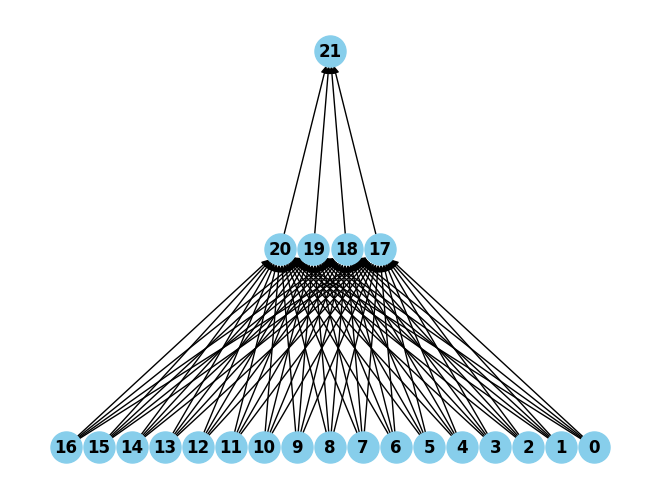

In [6]:
TR_INPUT = len(tr_df_OHE.columns) - 1
TR_OUTPUT = 1
hidden_len = 4
topology = create_stratified_topology([TR_INPUT,hidden_len,TR_OUTPUT], 
                                      [[None,[]]]*TR_INPUT + [['sigmoid', [1]]]*hidden_len + [['sigmoid', [1]]])
NeuralNetwork.display_topology(topology)

In [7]:
df = pd.read_csv('../data/gs_data/monk_3_selection.csv')

df.sample(3, random_state=RANDOM_STATE)

df['mean_metrics'] = df['mean_metrics'].apply(lambda x: ast.literal_eval(x))

df = df.sort_values(by=['mean_metrics'], ascending=True)

In [8]:
df.iloc[0]['stats']

"{'max_epochs': 600, 'training_set_len': 98, 'min_epochs': 80, 'patience': 50, 'minibatch_size': 1, 'lambda_tikhonov': 0.0001, 'learning_rate': 0.5, 'error_decrease_tolerance': 1e-05, 'alpha_momentum': 0.4, 'units_weights': [{20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}], 'mean_epoch_train_time': [0, 0, 0, 0, 0], 'units_weights_batch': [{20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}, {20: [], 19: [], 18: [], 17: [], 21: []}], 'epochs': [0, 0, 0, 0, 0], 'total_train_time': [datetime.timedelta(days=-1, seconds=86399, microseconds=999996), datetime.timedelta(days=-1, seconds=86399, microseconds=999995), datetime.timedelta(days=-1, seconds=86399, microseconds=999995), datetime.timedelta(days=-1, seconds=86399, m

In [9]:
#df[['team1','team2']] = pd.DataFrame(df.teams.tolist(), index= df.index)

In [10]:
df.drop(['stats', 'topology'], axis=1)#.sort_values(by=['mean']).head(5)#.style.background_gradient(cmap='Blues')

,alpha_momentum,batch_size,error_decrease_tolerance,lambda_tikhonov,learning_rate,max_epochs,min_epochs,patience,mean_metrics,variance_metrics
249,0.4,1,0.00001,0.0001,0.5,600,80,50,[0.06877106846022395],[0.0004069443643033116]
48,0.6,8,0.00001,0.0001,0.4,600,80,50,[0.06927882164562793],[0.00025274577393038074]
68,0.6,1,0.00001,0.0001,0.4,600,80,50,[0.0699798654440642],[0.0008415143262094834]
66,0.6,1,0.00001,0.0001,0.2,600,80,50,[0.07002339196471286],[0.0009820516951231587]
188,0.3,1,0.00001,0.0001,0.4,600,80,50,[0.07011270521611612],[0.002034468999725124]
...,...,...,...,...,...,...,...,...,...,...
237,0.4,1,0.00001,0.0100,0.3,600,80,50,[0.2633326115569269],[0.0005969473623427953]
236,0.4,1,0.00001,0.0100,0.2,600,80,50,[0.26379988557542555],[0.00010646552685284619]
299,0.5,1,0.00001,0.0100,0.5,600,80,50,[0.26636133555639174],[0.00010355272127869991]
201,0.3,97,0.00001,0.0010,0.2,600,80,50,[0.2665552169660431],[0.0005798572776711315]


In [11]:
NN = NeuralNetwork(topology, -0.75, 0.75, False, RANDOM_STATE)

In [12]:
training_set = tr_df_OHE.values
validation_set = val_df_OHE.values
metrics = [ErrorFunctions.mean_squared_error, ErrorFunctions.mean_euclidean_error]

batch_size = int(len_training/20)
max_epochs = 1000

error_decrease_tolerance = 0.0001
patience = 10
min_epochs = 100

lambda_tikhonov = 0.0001

adamax = True
learning_rate = 0.04/batch_size
exp_decay_rates_1 = 0.9
exp_decay_rates_2 = 0.5

stats = NN.train(training_set, validation_set, batch_size, max_epochs, error_decrease_tolerance, patience, min_epochs, 
                   adamax_learning_rate=learning_rate, 
                   adamax=adamax, 
                   exp_decay_rates_1=exp_decay_rates_1,
                   exp_decay_rates_2=exp_decay_rates_2,
                
                   metrics=metrics,
                   collect_data=True,
                   verbose=True,
                   )

starting values:  {'training_set_len': 122, 'minibatch_size': 6, 'max_epochs': 1000, 'error_decrease_tolerance': 0.0001, 'patience': 10, 'min_epochs': 100, 'learning_rate': 0.01, 'lambda_tikhonov': 0.0, 'alpha_momentum': 0.0, 'nesterov': False, 'adamax': True, 'adamax_learning_rate': 0.006666666666666667, 'exp_decay_rates_1': 0.9, 'exp_decay_rates_2': 0.5, 'epochs': 0, 'total_train_time': datetime.timedelta(0), 'mean_epoch_train_time': 0, 'units_weights': {20: [], 19: [], 18: [], 17: [], 21: []}, 'units_weights_batch': {20: [], 19: [], 18: [], 17: [], 21: []}, 'training_mean_squared_error': [], 'validation_mean_squared_error': [], 'training_batch_mean_squared_error': [], 'validation_batch_mean_squared_error': [], 'training_mean_euclidean_error': [], 'validation_mean_euclidean_error': [], 'training_batch_mean_euclidean_error': [], 'validation_batch_mean_euclidean_error': []}
[1/1000] tr time: 0:00:00.067845 | mean_squared_error: tr=0.3031391548243117 val=0.2883566048445947 | | mean_eucl

In [13]:
NN_2 = NeuralNetwork(topology, -0.75, 0.75, False, RANDOM_STATE)

In [14]:
batch_size = 8
max_epochs = 600

error_decrease_tolerance = 0.00001
patience = 10
min_epochs = 80

lambda_tikhonov = 0.0001
alpha_momentum = 0.6
learning_rate = 0.4/batch_size
# beacause of the momentum is used the learning rate needs to be a little less?!?!?

collect_datas = True
collect_datas_batch = False # per il momento. molto costoso!!!! False di default
verbose = True

stats = NN_2.train(training_set, validation_set, batch_size, max_epochs, error_decrease_tolerance, patience, min_epochs, 
                   learning_rate, 0,0, lambda_tikhonov, alpha_momentum, False,metrics=metrics, collect_data=collect_datas, 
                   collect_data_batch=collect_datas_batch, verbose=verbose)

starting values:  {'training_set_len': 122, 'minibatch_size': 8, 'max_epochs': 600, 'error_decrease_tolerance': 1e-05, 'patience': 10, 'min_epochs': 80, 'learning_rate': 0.05, 'lambda_tikhonov': 0.0001, 'alpha_momentum': 0.6, 'nesterov': False, 'adamax': False, 'adamax_learning_rate': 0.01, 'exp_decay_rates_1': 0.9, 'exp_decay_rates_2': 0.999, 'epochs': 0, 'total_train_time': datetime.timedelta(0), 'mean_epoch_train_time': 0, 'units_weights': {20: [], 19: [], 18: [], 17: [], 21: []}, 'units_weights_batch': {20: [], 19: [], 18: [], 17: [], 21: []}, 'training_mean_squared_error': [], 'validation_mean_squared_error': [], 'training_batch_mean_squared_error': [], 'validation_batch_mean_squared_error': [], 'training_mean_euclidean_error': [], 'validation_mean_euclidean_error': [], 'training_batch_mean_euclidean_error': [], 'validation_batch_mean_euclidean_error': []}


[1/600] tr time: 0:00:00.055919 | mean_squared_error: tr=0.2479153626769279 val=0.24826349329767367 | | mean_euclidean_error: tr=0.49700315568292397 val=0.49735093961636484 | 
[2/600] tr time: 0:00:00.042662 | mean_squared_error: tr=0.24305681932495568 val=0.24574571783439858 | | mean_euclidean_error: tr=0.49166597375258886 val=0.49434327700101305 | 
[3/600] tr time: 0:00:00.046799 | mean_squared_error: tr=0.2376797633848767 val=0.2408479064533902 | | mean_euclidean_error: tr=0.48566669562052694 val=0.4887912045824897 | 
[4/600] tr time: 0:00:00.055358 | mean_squared_error: tr=0.23187764165371882 val=0.23651945726897214 | | mean_euclidean_error: tr=0.47805716182550817 val=0.48264757668915126 | 
[5/600] tr time: 0:00:00.048332 | mean_squared_error: tr=0.21974204682101098 val=0.22386834276548864 | | mean_euclidean_error: tr=0.46461623567645455 val=0.4686506094955212 | 
[6/600] tr time: 0:00:00.044114 | mean_squared_error: tr=0.2072185840384096 val=0.21012771573200137 | | mean_euclidean_e

KeyboardInterrupt: 

In [15]:
tr_predictions = NN.predict_array(training_set[:,:TR_INPUT])
val_predictions = NN.predict_array(validation_set[:,:TR_INPUT])

In [16]:
pd.options.mode.chained_assignment = None
prediction_col = ['prediction_1']#, 'prediction_2', 'prediction_3']
for col in prediction_col:
    tr_df[prediction_col] = np.array([[1] if x > 0.5 else [0] for x in tr_predictions])
    tr_df[col + '_err'] = (tr_df[col] - tr_df['output_' + col[-1]])**2
    

In [17]:
tr_df['prediction_1_err'].max()

1

In [18]:
tr_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,output_1,prediction_1,prediction_1_err
93,3,1,1,3,4,2,0,0,0
16,1,1,2,3,3,2,1,1,0
17,1,2,1,1,3,1,1,1,0
95,3,1,2,2,3,2,1,1,0
35,1,3,1,1,2,1,0,0,0


In [19]:
val_df[prediction_col] = val_predictions
for col in prediction_col:
    val_df[prediction_col] = np.array([[1] if x > 0.5 else [0] for x in val_predictions])
    val_df[col + '_err'] = (val_df[col] - val_df['output_' + col[-1]])**2
    

In [20]:
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,input_6,output_1,prediction_1,prediction_1_err
173,2,1,2,1,3,2,1,1,0
91,1,2,2,3,2,2,1,1,0
105,1,3,1,2,1,2,0,0,0
431,3,3,2,3,4,2,0,0,0
389,3,3,1,1,3,2,1,0,1


In [21]:
print('training accuracy =', (tr_df['output_1'] == tr_df['prediction_1']).sum() / len(tr_df))
print('validation accuracy =', (val_df['output_1'] == val_df['prediction_1']).sum() / len(val_df))

training accuracy = 0.9344262295081968
validation accuracy = 0.9722222222222222


In [22]:
print('misclassified =', (tr_df['output_1'] != tr_df['prediction_1']).sum(), 'su', len(tr_df))
print('misclassified =', (val_df['output_1'] != val_df['prediction_1']).sum(), 'su', len(val_df))

misclassified = 8 su 122
misclassified = 12 su 432


In [23]:
for key in list(stats.keys())[:16]:
    print(key, ':', stats[key])

training_set_len : 122
minibatch_size : 6
max_epochs : 1000
error_decrease_tolerance : 0.0001
patience : 10
min_epochs : 100
learning_rate : 0.01
lambda_tikhonov : 0.0
alpha_momentum : 0.0
nesterov : False
adamax : True
adamax_learning_rate : 0.006666666666666667
exp_decay_rates_1 : 0.9
exp_decay_rates_2 : 0.5
epochs : 1000
total_train_time : 0:00:47.549317


In [24]:
for met in metrics:
    print('last training ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])
    print('last validation ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])

last training mean_squared_error : 0.06146206905389177
last validation mean_squared_error : 0.06146206905389177
last training mean_euclidean_error : 0.12020870096211668
last validation mean_euclidean_error : 0.12020870096211668


In [25]:
for met in metrics:
    print('last training ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])
    print('last validation ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])

last training mean_squared_error : 0.06146206905389177
last validation mean_squared_error : 0.06146206905389177
last training mean_euclidean_error : 0.12020870096211668
last validation mean_euclidean_error : 0.12020870096211668


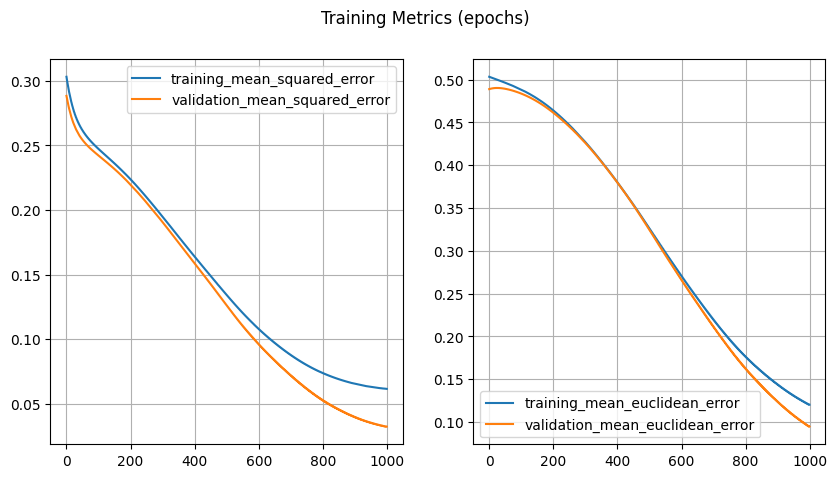

In [26]:
if len(metrics) > 1:
    fig, ax = plt.subplots(1, len(metrics), figsize=(10, 5))
    plt.suptitle('Training Metrics (epochs)')
    for i in range(len(metrics)):
        multy_plot([stats['training_' + metrics[i].__name__], stats['validation_' + metrics[i].__name__]], 
                ['training_' + metrics[i].__name__, 'validation_' + metrics[i].__name__],
                ax=ax[i])
else:
    plt.suptitle('Training Metrics (epochs)')
    multy_plot([stats['training_' + metrics[0].__name__], stats['validation_' + metrics[0].__name__]], 
                ['training_' + metrics[0].__name__, 'validation_' + metrics[0].__name__])

In [ ]:

'''plt.suptitle('Training Metrics (epochs)')
for i in range(len(metrics)):
    multy_plot([stats_0['training_' + metrics[i].__name__], stats_0['validation_' + metrics[i].__name__]] + 
               [stats_1['training_' + metrics[i].__name__], stats_1['validation_' + metrics[i].__name__]] +
               [stats_2['training_' + metrics[i].__name__], stats_2['validation_' + metrics[i].__name__]] +
               [stats_3['training_' + metrics[i].__name__], stats_3['validation_' + metrics[i].__name__]],
            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], 
            title='Training Metrics (epochs)')'''

"plt.suptitle('Training Metrics (epochs)')\nfor i in range(len(metrics)):\n    multy_plot([stats_0['training_' + metrics[i].__name__], stats_0['validation_' + metrics[i].__name__]] + \n               [stats_1['training_' + metrics[i].__name__], stats_1['validation_' + metrics[i].__name__]] +\n               [stats_2['training_' + metrics[i].__name__], stats_2['validation_' + metrics[i].__name__]] +\n               [stats_3['training_' + metrics[i].__name__], stats_3['validation_' + metrics[i].__name__]],\n            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], \n            title='Training Metrics (epochs)')"

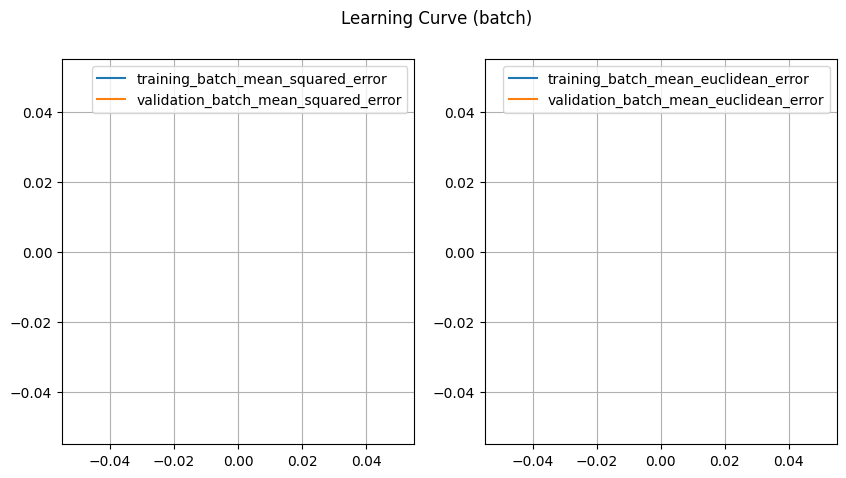

In [27]:
if len(metrics) > 1:
    fig, ax = plt.subplots(1, len(metrics), figsize=(10, 5))
    plt.suptitle('Learning Curve (batch)')
    for i in range(len(metrics)):
        multy_plot([stats['training_batch_' + metrics[i].__name__], stats['validation_batch_' + metrics[i].__name__]], 
                ['training_batch_' + metrics[i].__name__, 'validation_batch_' + metrics[i].__name__],
                ax=ax[i])
    plt.show()
else:
    plt.suptitle('Training Metrics (batch)')
    multy_plot([stats['training_batch_' + metrics[0].__name__], stats['validation_batch_' + metrics[0].__name__]], 
                ['training_batch_' + metrics[0].__name__, 'validation_batch_' + metrics[0].__name__])

In [ ]:
'''plt.suptitle('Training Metrics (epochs)')
for i in range(len(metrics)):
    multy_plot([stats_0['training_batch_' + metrics[i].__name__], stats_0['validation_batch_' + metrics[i].__name__]] + 
               [stats_1['training_batch_' + metrics[i].__name__], stats_1['validation_batch_' + metrics[i].__name__]] +
               [stats_2['training_batch_' + metrics[i].__name__], stats_2['validation_batch_' + metrics[i].__name__]] +
               [stats_3['training_batch_' + metrics[i].__name__], stats_3['validation_batch_' + metrics[i].__name__]] + 
               [stats_4['training_batch_' + metrics[i].__name__], stats_4['validation_batch_' + metrics[i].__name__]],
            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], 
            title='Training Metrics (epochs)')'''

"plt.suptitle('Training Metrics (epochs)')\nfor i in range(len(metrics)):\n    multy_plot([stats_0['training_batch_' + metrics[i].__name__], stats_0['validation_batch_' + metrics[i].__name__]] + \n               [stats_1['training_batch_' + metrics[i].__name__], stats_1['validation_batch_' + metrics[i].__name__]] +\n               [stats_2['training_batch_' + metrics[i].__name__], stats_2['validation_batch_' + metrics[i].__name__]] +\n               [stats_3['training_batch_' + metrics[i].__name__], stats_3['validation_batch_' + metrics[i].__name__]] + \n               [stats_4['training_batch_' + metrics[i].__name__], stats_4['validation_batch_' + metrics[i].__name__]],\n            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], \n            title='Training Metrics (epochs)')"

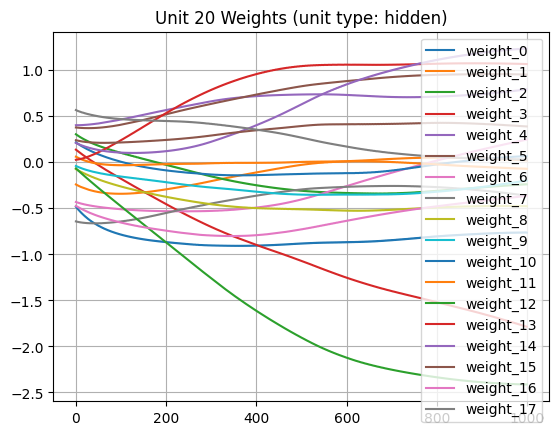

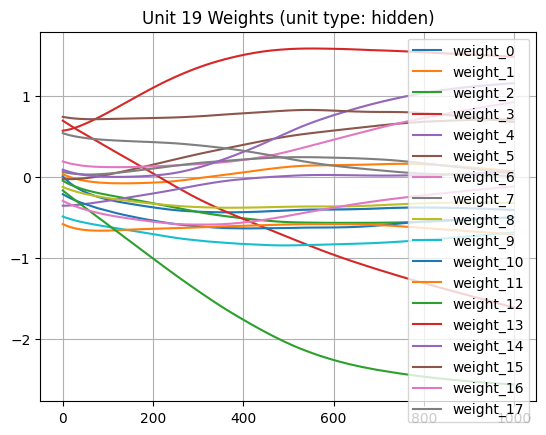

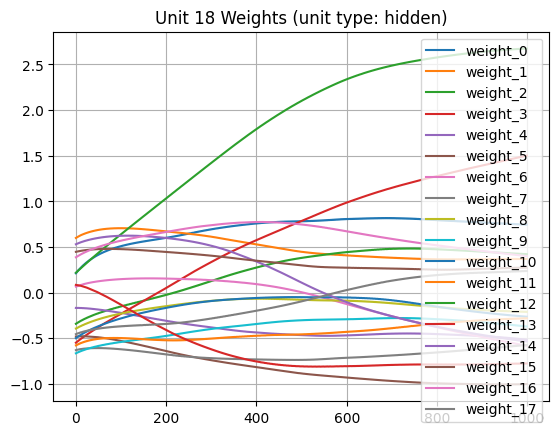

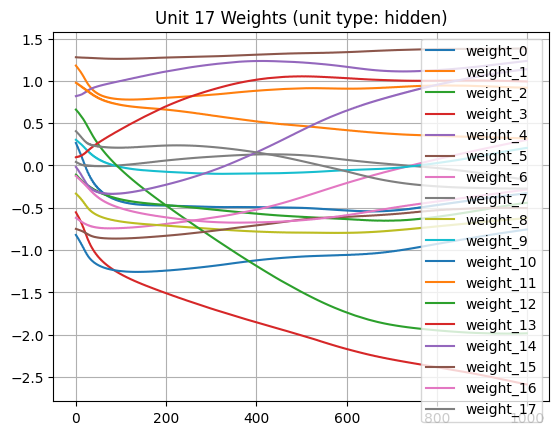

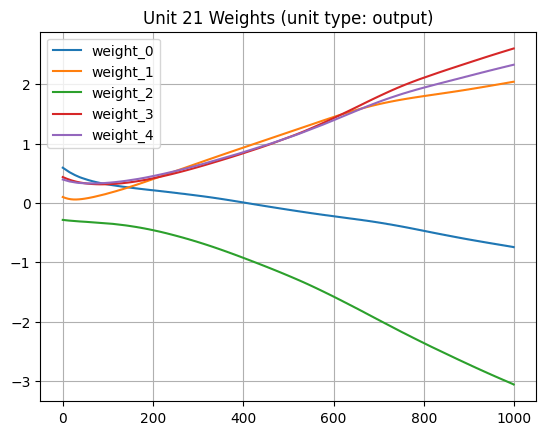

In [28]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

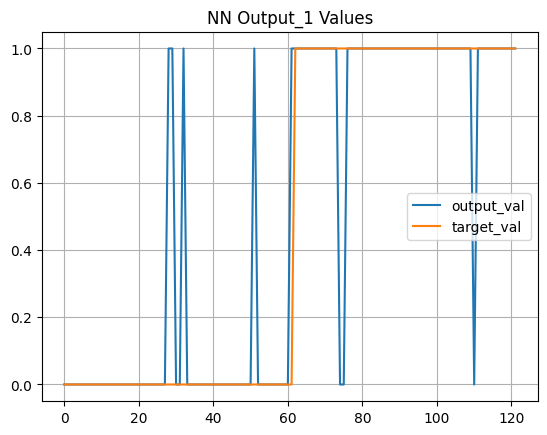

In [29]:
for i in range(TR_OUTPUT):
    sorted_order = training_set[:, TR_INPUT + i].argsort()
    multy_plot([tr_df['prediction_1'].values[sorted_order] , tr_df['output_1'].values[sorted_order]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

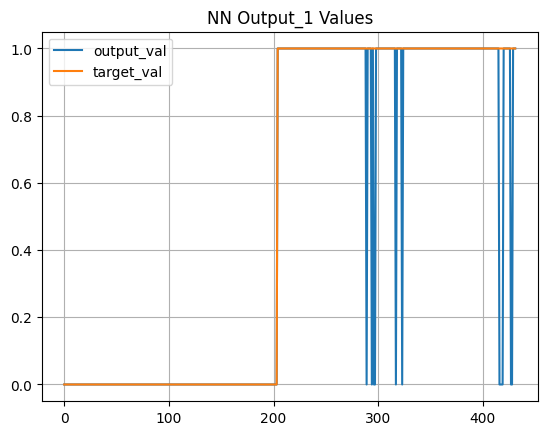

In [30]:
for i in range(TR_OUTPUT):
    sorted_order = validation_set[:, TR_INPUT + i].argsort()
    multy_plot([val_df['prediction_1'].values[sorted_order] , val_df['output_1'].values[sorted_order]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')